# setup


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd


In [4]:
frame = pd.read_pickle('Data\ANA_clean.pkl')
#df_10 =  pd.read_pickle('Data\ANA_1981-2010_10_raw.pkl') #filter_df(frame, '1981-01-01', '2010-12-01', 10)
#df_91 = pd.read_pickle('Data\ANA_1991-2010_10_raw.pkl')
stations = pd.read_csv('Data\stations.csv', index_col='Codigo')

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.read_file('Data\stations.geojson')
gdf

,Code,Name,Latitude,Longitude,Altitude,geometry
0,75001,PANTOJA,-0.9667,-75.2000,200.0,POINT (-75.20000 -0.96670)
1,75005,GUEPPI,-0.1167,-75.2500,300.0,POINT (-75.25000 -0.11670)
2,173000,PUERTO ARTURO,-1.8000,-73.3167,260.0,POINT (-73.31670 -1.80000)
3,175000,ARICA,-1.6000,-75.2000,250.0,POINT (-75.20000 -1.60000)
4,370000,CABALLOCOCHA,-3.9000,-70.5333,84.0,POINT (-70.53330 -3.90000)
...,...,...,...,...,...,...
21376,2346398,PIRAJUCARA,-23.6500,-46.7833,770.0,POINT (-46.78330 -23.65000)
21377,2749028,SUBIDA,-27.0833,-49.4500,121.0,POINT (-49.45000 -27.08330)
21378,2346792,SB-CA-BAC Barragem Águas Claras,-23.3981,-46.6583,860.0,POINT (-46.65830 -23.39810)
21379,2040200,FAZENDA SANTA ROSA,-20.1439,-40.4317,NaN,POINT (-40.43170 -20.14390)


In [ ]:
date_range = pd.date_range(start = '1981-01-01', end = '2010-12-01', freq='MS' )


# clean and save data


In [ ]:
def filter_df(frame, start, end, na):  
    date_begin = start
    date_end = end
    tail = frame.sort_values('Data').groupby('EstacaoCodigo').tail(1)
    head = frame.sort_values('Data').groupby('EstacaoCodigo').head(1)
    list_begin = head[head['Data'] <= date_begin]['EstacaoCodigo'].to_list()
    list_end = tail[tail['Data'] >= date_end]['EstacaoCodigo'].to_list()
    df_inf = frame[frame['EstacaoCodigo'].isin(list_end)]
    dff = df_inf[df_inf['EstacaoCodigo'].isin(list_begin)]
    dff_date = dff[(dff['Data'] >= date_begin) & (dff['Data'] <= date_end)]
    total = len(dff_date['EstacaoCodigo'].unique())
    date_range = pd.date_range(start = date_begin, end = date_end, freq='MS' )
    codes = dff_date['EstacaoCodigo'].unique()
    df_na = dff_date.dropna()
    diff_list = []
    for code in codes:
        diff = date_range.difference(df_na[df_na['EstacaoCodigo']==code]['Data'])
        diff_list.append(len(diff))
    difs_date_series = pd.Series(diff_list, index=codes)
    values_na = difs_date_series / len(date_range) *100
    na_codes_list= values_na[values_na < na].index.to_list()
    df_final = df_na[df_na['EstacaoCodigo'].isin(na_codes_list)]
    dff = df_final.rename(columns={'EstacaoCodigo':'Code','NivelConsistencia':'Consistency', 'Data': 'Date'})
    return dff

In [ ]:
#df_10 = filter_df(frame, '1981-01-01', '2010-12-01', 10)
#df_10.to_pickle('ANA_1981-2010_10_raw.pkl')
#df_91 = filter_df(frame, '1991-01-01', '2010-12-01', 10)
#df_91.to_pickle('ANA_1991-2010_10_raw.pkl')


#stations_list = df_10['EstacaoCodigo'].unique()
#for stat in stations_list:    
#   df_stat = df_10[df_10['EstacaoCodigo'] == stat]
#   df_stat.to_csv(r'C:\Users\luisg\OneDrive\Documentos\Python_Scripts\data\filtered\\' + str(stat) + '.csv', index=False)

# FILTER ANALYSIS

In [8]:
frame

,Code,Consistency,Date,Total
0,1036003,1,2000-04-01,176.3
1,1036003,1,2000-03-01,65.2
2,1036003,1,2000-02-01,115.0
3,1036003,1,2000-01-01,95.0
4,1036003,1,1999-12-01,44.8
...,...,...,...,...
4860103,972000,2,1982-10-01,155.0
4860104,972000,2,1982-09-01,182.7
4860105,972000,2,1982-08-01,25.3
4860106,972000,2,1982-07-01,47.7


In [9]:
all_stations = stations.shape[0]
not_null_stations = frame['Code'].unique().shape[0]
null_stations = all_stations - not_null_stations
print('All stations: ', all_stations)
print('Stations without data: ', null_stations)
print('Stations with data: ', not_null_stations)

All stations:  0
Stations without data:  -11116
Stations with data:  11116


## DATES

<AxesSubplot: xlabel='Data', ylabel='Density'>

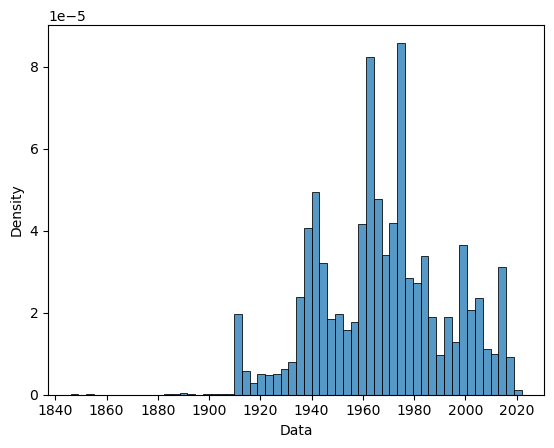

In [ ]:
begin_dates = frame.sort_values('Data').groupby('EstacaoCodigo').head(1)['Data']
sns.histplot(begin_dates, stat = 'density')

<AxesSubplot: xlabel='Data', ylabel='Density'>

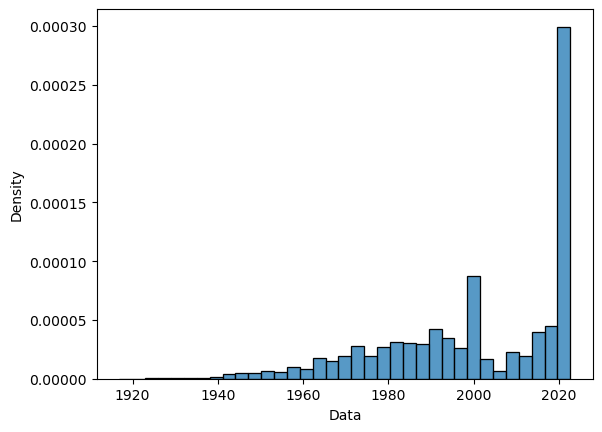

In [ ]:
end_dates = frame.sort_values('Data').groupby('EstacaoCodigo').tail(1)['Data']
sns.histplot(end_dates, stat = 'density')

In [ ]:
frame

,Code,Consistency,Date,Total
0,1036003,1,2000-04-01,176.3
1,1036003,1,2000-03-01,65.2
2,1036003,1,2000-02-01,115.0
3,1036003,1,2000-01-01,95.0
4,1036003,1,1999-12-01,44.8
...,...,...,...,...
4860103,972000,2,1982-10-01,155.0
4860104,972000,2,1982-09-01,182.7
4860105,972000,2,1982-08-01,25.3
4860106,972000,2,1982-07-01,47.7


In [ ]:
frame['EstacaoCodigo'].unique().shape[0]

In [12]:
first_dates = frame.sort_values('Date').groupby('Code').head(1).drop(columns=['Consistency','Total']).rename(columns={'Date':'first_records'})
last_dates = frame.sort_values('Date').groupby('Code').tail(1).drop(columns=['Consistency','Total']).rename(columns={'Date':'last_records'})
limits_date = first_dates.merge(last_dates, on='Code', how='left')
limits_date['Duration'] = limits_date['last_records'] - limits_date['first_records']
limits_date.set_index('Code', inplace=True)
gdf_dates = gdf.join(limits_date, on='Code', how='right')
gdf_dates

,Code,Name,Latitude,Longitude,Altitude,geometry,first_records,last_records,Duration
8062,8658002,GEORGETOWN - GUYANA,6.8000,-58.2000,2.0,POINT (-58.20000 6.80000),1846-01-01,2007-07-01,58985 days
6074,8452001,CAYENNE-ROCHAMBEAU,4.8000,-52.4000,9.0,POINT (-52.40000 4.80000),1847-01-01,2010-02-01,59566 days
7596,8555001,CULTUURTUIN,5.8333,-55.1667,2.0,POINT (-55.16670 5.83330),1847-01-01,1992-12-01,53295 days
1091,1943000,MINERAÇÃO MORRO VELHO,-19.9792,-43.8500,770.0,POINT (-43.85000 -19.97920),1855-01-01,2018-07-01,59716 days
8063,8658003,LEONORA,6.8700,-58.2800,NaN,POINT (-58.28000 6.87000),1883-01-01,1971-12-01,32475 days
...,...,...,...,...,...,...,...,...,...
2730,2653070,PCH GARÇA BRANCA MONTANTE,-26.5406,-53.4375,362.0,POINT (-53.43750 -26.54060),2019-10-01,2019-12-01,61 days
10921,2751062,PCH TUPITINGA BARRAMENTO,-27.5322,-51.4233,681.0,POINT (-51.42330 -27.53220),2019-10-01,2019-12-01,61 days
18178,2147190,CLUBE DE REGATAS,-21.1036,-47.7572,495.0,POINT (-47.75720 -21.10360),2020-12-01,2022-06-01,547 days
18241,765002,SERINGAL FLORESTA,-7.9761,-65.2319,NaN,POINT (-65.23190 -7.97610),2021-03-01,2022-02-01,337 days


In [19]:
gdf_dates = gdf_dates.sort_values('Code').reset_index(drop=True)
gdf_dates['Duration'] = gdf_dates['Duration'].dt.days
gdf_dates['Duration'] = gdf_dates['Duration'].astype(float)
gdf_dates['Duration'] = gdf_dates['Duration'] /365
gdf_dates.to_file('Data\stations_all.geojson', driver='GeoJSON')

In [22]:
gdf_dates.to_file('Data\stations_all.geojson', driver='GeoJSON')

In [18]:
gdf_dates['Duration_days'] = gdf_dates['Duration'].dt.days
gdf_dates['last_year'] = gdf_dates['last_records'].dt.year
gdf_dates['first_year'] = gdf_dates['first_records'].dt.year

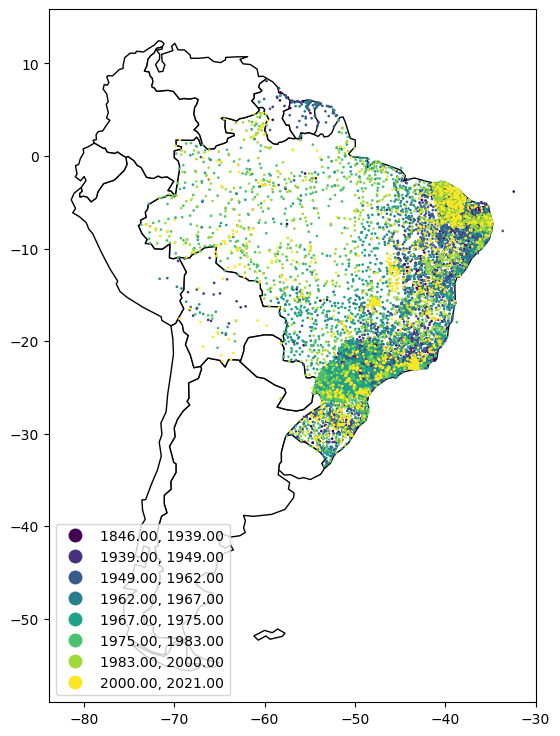

In [19]:
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')


# We can now plot our ``GeoDataFrame``.
gdf_dates.plot(ax=ax, column='first_year',scheme="quantiles", k=8,  markersize=0.8, legend=True)

plt.show()

## NA VALUES

In [55]:

date_begin = '1981-01-01'
date_end = '2010-12-01'
tail = frame.sort_values('Data').groupby('EstacaoCodigo').tail(1)
head = frame.sort_values('Data').groupby('EstacaoCodigo').head(1)
list_begin = head[head['Data'] <= date_begin]['EstacaoCodigo'].to_list()
list_end = tail[tail['Data'] >= date_end]['EstacaoCodigo'].to_list()
df_inf = frame[frame['EstacaoCodigo'].isin(list_end)]
dff = df_inf[df_inf['EstacaoCodigo'].isin(list_begin)]
dff_date = dff[(dff['Data'] >= date_begin) & (dff['Data'] <= date_end)]
len(dff_date['EstacaoCodigo'].unique())


2445

[(0.0, 30.0)]

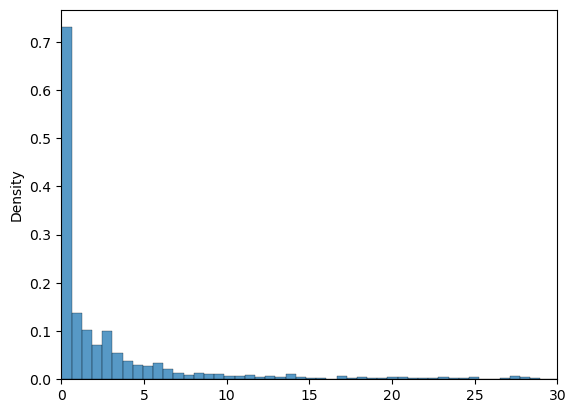

In [56]:
date_range = pd.date_range(start = date_begin, end = date_end, freq='MS' )
codes = dff_date['EstacaoCodigo'].unique()
df = dff_date.dropna()
diff_list = []
for code in codes:
    diff = date_range.difference(df[df['EstacaoCodigo']==code]['Data'])
    diff_list.append(len(diff))

difs_date_series = pd.Series(diff_list, index=codes)
values_na = difs_date_series / len(date_range) *100
sns.histplot(values_na, stat = 'density').set(xlim=[0,30])


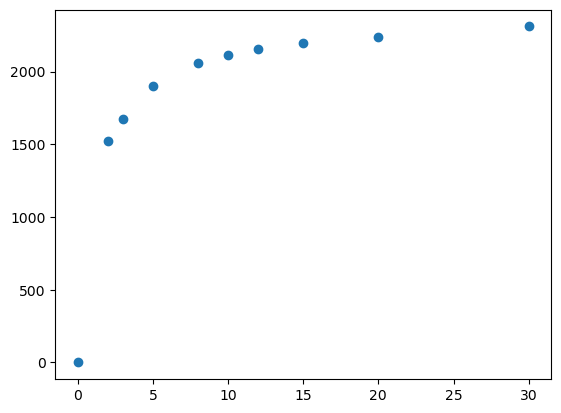

In [57]:
nas = [0,2,3,5,8,10,12,15,20,30]
list_na = []
for na in nas:
    list_na.append((values_na < na).sum())
    
plt.scatter(nas, list_na)    

### maps NA e Dates

In [75]:
date_begin = '1981-01-01'
date_end = '2010-12-01'
na = 10

tail = frame.sort_values('Data').groupby('EstacaoCodigo').tail(1)
head = frame.sort_values('Data').groupby('EstacaoCodigo').head(1)
list_begin = head[head['Data'] <= date_begin]['EstacaoCodigo'].to_list()
list_end = tail[tail['Data'] >= date_end]['EstacaoCodigo'].to_list()
df_inf = frame[frame['EstacaoCodigo'].isin(list_end)]
dff = df_inf[df_inf['EstacaoCodigo'].isin(list_begin)]
dff_date = dff[(dff['Data'] >= date_begin) & (dff['Data'] <= date_end)]
stations_filtered_date = frame[~frame['EstacaoCodigo'].isin(dff_date['EstacaoCodigo'].unique())].EstacaoCodigo.unique()#.shape[0]

total = len(dff_date['EstacaoCodigo'].unique())
date_range = pd.date_range(start = date_begin, end = date_end, freq='MS' )
codes = dff_date['EstacaoCodigo'].unique()
df = dff_date.dropna()
diff_list = []
for code in codes:
    diff = date_range.difference(df[df['EstacaoCodigo']==code]['Data'])
    diff_list.append(len(diff))
difs_date_series = pd.Series(diff_list, index=codes)
values_na = difs_date_series / len(date_range) *100
na_codes_list= values_na[values_na < na].index.to_list()
stations_filtered_NA = dff_date[~dff_date['EstacaoCodigo'].isin(na_codes_list)].EstacaoCodigo.unique()
#df_final = df_na[df_na['EstacaoCodigo'].isin(na_codes_list)]
#dff = df_final.rename(columns={'EstacaoCodigo':'Code','NivelConsistencia':'Consistency', 'Data': 'Date'})

In [81]:
gdf_NA = gdf[(gdf.index.isin(stations_filtered_NA))]
gdf_dates = gdf[(gdf.index.isin(stations_filtered_date))]

In [109]:
gdf_NA = gdf_NA.sort_index().join(values_na.sort_index().rename('NA'))

In [110]:
gdf_NA

,Unnamed: 0,Nome,Latitude,Longitude,Altitude,geometry,NA
Codigo,,,,,,,
60000,1952,BASE ALALAÚ,-0.8558,-60.5219,59.00,POINT (-60.52190 -0.85580),32.500000
67000,10413,SÃO GABRIEL DA CACHOEIRA,-0.1253,-67.0611,79.71,POINT (-67.06110 -0.12530),12.222222
148001,32942,BELÉM,-1.4500,-48.5000,NaN,POINT (-48.50000 -1.45000),63.055556
159000,8144,BALBINA P-8 (UHE BALBINA),-1.9381,-59.4833,33.00,POINT (-59.48330 -1.93810),38.055556
160000,8145,POSTO ABONARI - FUNAI,-1.2989,-60.3997,NaN,POINT (-60.39970 -1.29890),16.944444
...,...,...,...,...,...,...,...
3056006,26927,HARMONIA,-30.0686,-56.1703,140.00,POINT (-56.17030 -30.06860),10.833333
8161000,12335,CARACARAÍ,1.8325,-61.1208,94.05,POINT (-61.12080 1.83250),36.388889
8250003,36019,AMAPÁ,2.0547,-50.7881,NaN,POINT (-50.78810 2.05470),10.833333


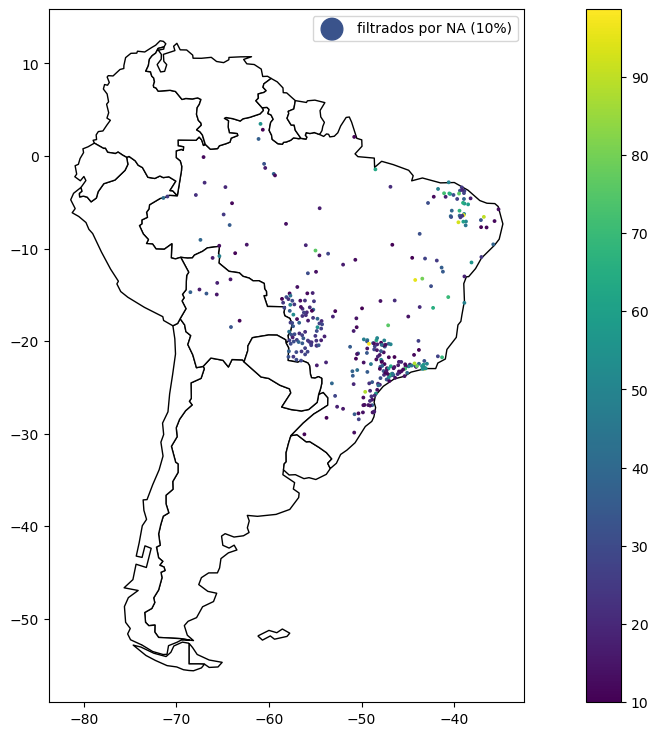

In [122]:


fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_NA.plot(ax=ax, markersize=3,label='filtrados por NA (10%)', column='NA', legend=True,)
#gdf_dates.plot(ax=ax, color='blue', markersize=0.1, label='Filtrados por Data', marker= '.')


plt.legend(loc='lower right')
ax.legend(markerscale=9)

plt.show()

## zeros


In [178]:
zero_values = df_10[df_10['Total'] == 0].groupby('Code').size() / len(date_range) *100
gdf_filtered = gdf[(gdf.index.isin(df_10['Code']))]
gdf_0 = gdf_filtered.sort_index().join(zero_values.sort_index().rename('zeros'))
gdf_0['zeros'] = gdf_0['zeros'].fillna(0)
gdf_0

,Unnamed: 0,Nome,Latitude,Longitude,Altitude,geometry,zeros
Codigo,,,,,,,
47002,3357,SALINÓPOLIS,-0.6231,-47.3536,NaN,POINT (-47.35360 -0.62310),23.611111
51002,8133,NAVIO,-0.3992,-51.4203,NaN,POINT (-51.42030 -0.39920),3.333333
52000,2069,SÃO FRANCISCO,-0.5711,-52.5750,NaN,POINT (-52.57500 -0.57110),0.555556
61000,1953,SANTA MARIA DO BOIAÇU,-0.5067,-61.7858,NaN,POINT (-61.78580 -0.50670),0.277778
63000,2892,CUMARU,-0.5983,-63.3978,NaN,POINT (-63.39780 -0.59830),0.000000
...,...,...,...,...,...,...,...
8351002,36092,OIAPOQUE,3.8436,-51.8375,NaN,POINT (-51.83750 3.84360),0.555556
8360000,36022,MALOCA DO CONTÃO,4.1667,-60.5289,NaN,POINT (-60.52890 4.16670),10.555556
8360002,26791,FAZENDA PASSARÃO,3.2078,-60.5711,NaN,POINT (-60.57110 3.20780),16.388889


<AxesSubplot: xlabel='zeros', ylabel='Count'>

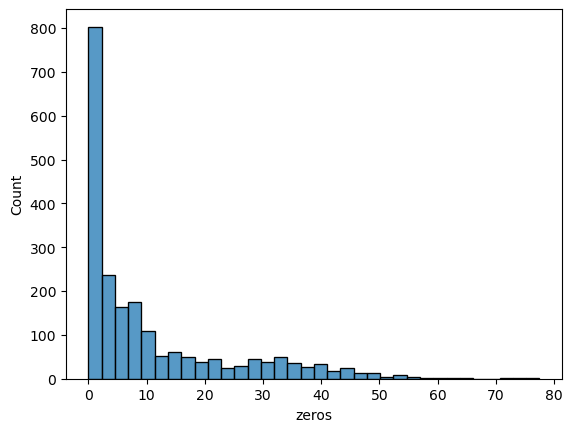

In [179]:
sns.histplot(gdf_0['zeros'])

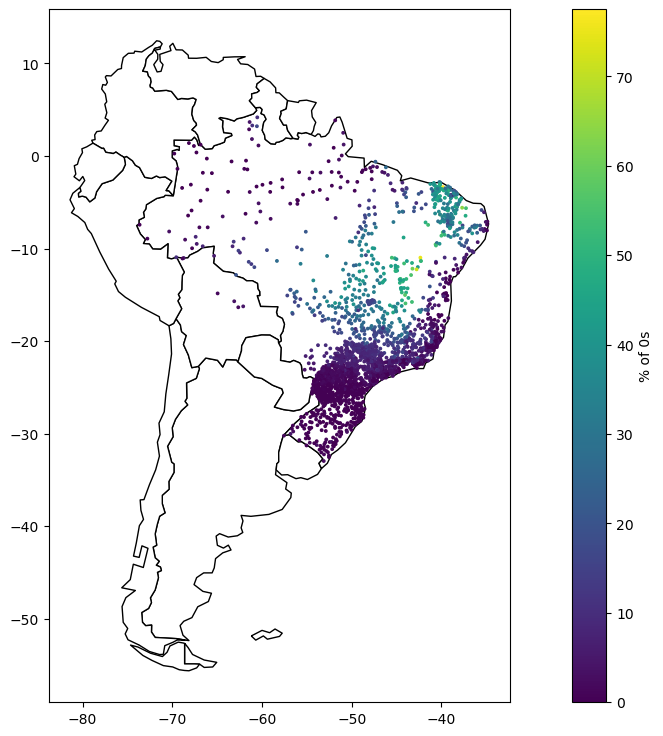

In [180]:
fig, ax = plt.subplots( figsize=(16, 9))
# We restrict to South America.
world[world.continent == 'South America'].plot(ax = ax,
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_0.plot(ax=ax, markersize=3, column='zeros', legend=True, legend_kwds={'label': r'% of 0s'})
#gdf_dates.plot(ax=ax, color='blue', markersize=0.1, label='Filtrados por Data', marker= '.')




plt.show()

## NA AND DATES

In [6]:
def dates_nas(start, end):
    date_begin = start
    date_end = end
    tail = frame.sort_values('Data').groupby('EstacaoCodigo').tail(1)
    head = frame.sort_values('Data').groupby('EstacaoCodigo').head(1)
    list_begin = head[head['Data'] <= date_begin]['EstacaoCodigo'].to_list()
    list_end = tail[tail['Data'] >= date_end]['EstacaoCodigo'].to_list()
    df_inf = frame[frame['EstacaoCodigo'].isin(list_end)]
    dff = df_inf[df_inf['EstacaoCodigo'].isin(list_begin)]
    dff_date = dff[(dff['Data'] >= date_begin) & (dff['Data'] <= date_end)]
    total = len(dff_date['EstacaoCodigo'].unique())
    date_range = pd.date_range(start = date_begin, end = date_end, freq='MS' )
    codes = dff_date['EstacaoCodigo'].unique()
    df = dff_date.dropna()
    diff_list = []
    for code in codes:
        diff = date_range.difference(df[df['EstacaoCodigo']==code]['Data'])
        diff_list.append(len(diff))

    difs_date_series = pd.Series(diff_list, index=codes)
    values_na = difs_date_series / len(date_range) *100
    na_5 = (values_na < 5).sum()
    na_10 = (values_na < 10).sum()


    return date_begin, date_end, total, na_5, na_10

In [42]:
date_na1 = dates_nas('1991-01-01', '2010-12-01')
date_na2 = dates_nas('1981-01-01', '2005-12-01')
#date_na3 = dates_nas('1980-01-01', '2009-12-01')
date_na4 = dates_nas('1981-01-01', '2010-12-01')


In [138]:
df_dates_na = pd.DataFrame([date_na1, date_na4], columns=['start', 'end', 'total', 'NA<5%', 'NA<10%'])
df_dates_na

,start,end,total,NA<5%,NA<10%
0,1991-01-01,2010-12-01,3039,2275,2621
1,1981-01-01,2010-12-01,2445,1903,2114


## Consistentcy

In [20]:
#bruto_porcent = df_na[df_na['NivelConsistencia']==1].groupby('EstacaoCodigo').size()/ len(date_range) * 100
#sns.histplot(bruto_porcent, stat='density')
date_begin = '1981-01-01'
date_end = '2010-12-01'
date_range = pd.date_range(start = date_begin, end = date_end, freq='MS' )

In [21]:
df_consist = df_10.sort_values('Consistency',ascending=True).drop_duplicates(subset=['Code','Date'], keep='last')

[(0.0, 100.0), Text(0.5, 0, 'Consistency (%)'), Text(0, 0.5, 'Frequency')]

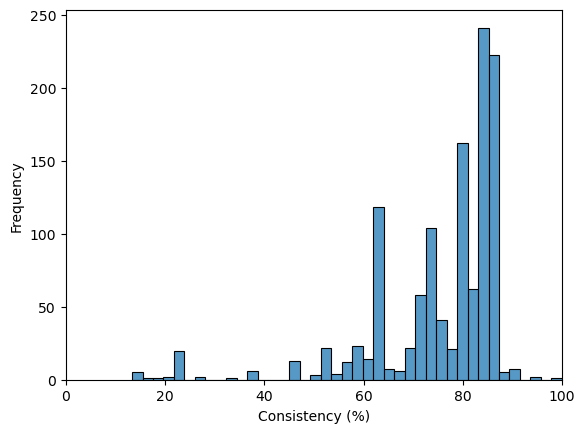

In [22]:
consist_porcent = df_consist[df_consist['Consistency']==2].groupby('Code').size()/ len(date_range) * 100
sns.histplot(consist_porcent).set(xlim=[0,100], xlabel='Consistency (%)', ylabel='Frequency')

[(0.0, 100.0), Text(0.5, 0, 'Consistency (%)'), Text(0, 0.5, 'Frequency')]

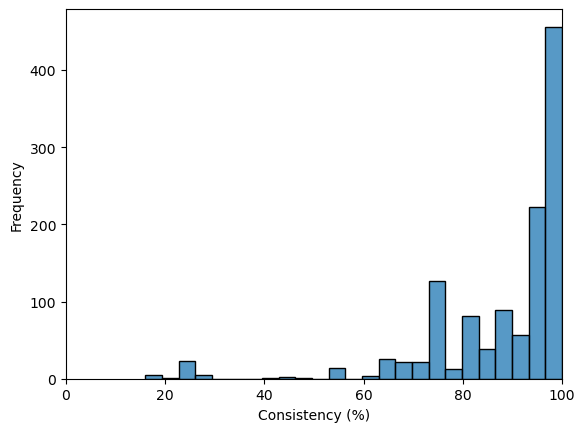

In [41]:
end = '2005-12-01'
df_const_lim = df_consist[df_consist['Date']  <= end]
date_range_const_lim = pd.date_range(start = '1981-01-01', end = end, freq='MS' )
consist_porcent_20 = df_const_lim[df_const_lim['Consistency']==2].groupby('Code').size()/ len(date_range_const_lim) * 100
sns.histplot(consist_porcent_20).set(xlim=[0,100], xlabel='Consistency (%)', ylabel='Frequency')

[(0.0, 100.0), Text(0.5, 0, 'Consistency (%)'), Text(0, 0.5, 'Frequency')]

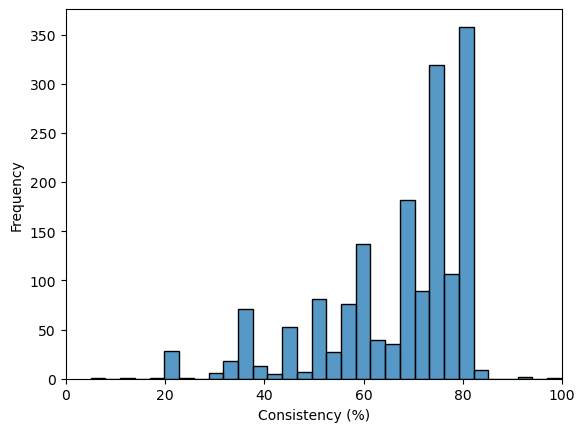

In [27]:
date_range_20 = pd.date_range(start = '1991-01-01', end = '2010-12-01', freq='MS' )
df_consist_20 = df_91.sort_values('Consistency',ascending=True).drop_duplicates(subset=['Code','Date'], keep='last')
consist_porcent_20 = df_consist_20[df_consist_20['Consistency']==2].groupby('Code').size()/ len(date_range_20) * 100
sns.histplot(consist_porcent_20).set(xlim=[0,100], xlabel='Consistency (%)', ylabel='Frequency')

## 20 or 30 years

C:\Users\luisg\AppData\Local\Temp\ipykernel_9396\2265006415.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(df_10.groupby('Code').mean()['Total'], stat='density').set(xlabel='mean monthly rainfall (mm)')


[Text(0.5, 0, 'mean monthly rainfall (mm)')]

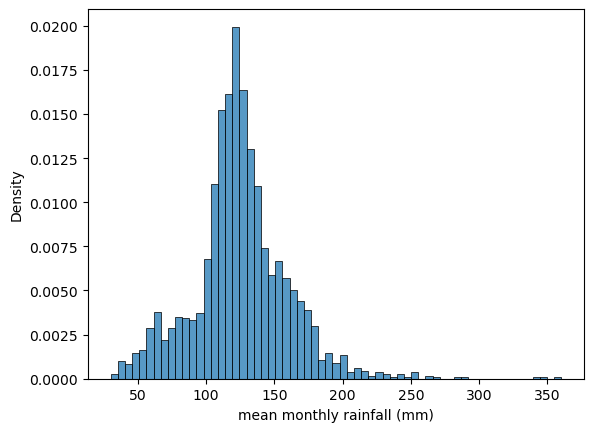

In [32]:
#df_10.groupby('Code').mean()
sns.histplot(df_10.groupby('Code').mean()['Total'], stat='density').set(xlabel='mean monthly rainfall (mm)')

In [68]:
df_inter = df_10[df_10['Date'] >= '1991-01-01']

C:\Users\luisg\AppData\Local\Temp\ipykernel_9396\2345674572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(df_inter.groupby('Code').mean()['Total'], stat='density').set(xlabel='mean monthly rainfall (mm)')


[Text(0.5, 0, 'mean monthly rainfall (mm)')]

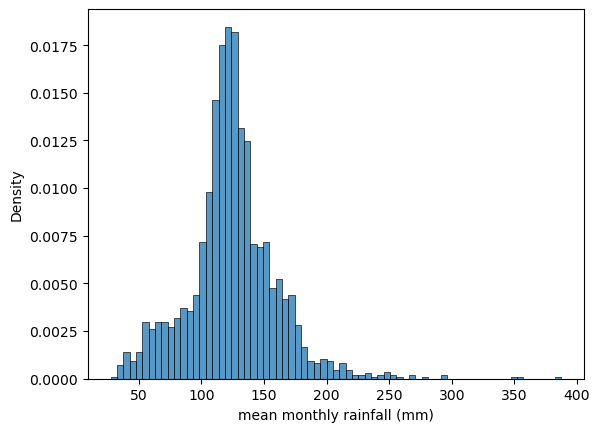

In [72]:
sns.histplot(df_inter.groupby('Code').mean()['Total'], stat='density').set(xlabel='mean monthly rainfall (mm)')


In [73]:
df_mean30 = df_10.drop(columns=['Consistency','Date']).groupby('Code').mean()
df_mean20 = df_inter.drop(columns=['Consistency','Date']).groupby('Code').mean()

In [79]:
df_merged = df_mean20.merge(df_mean30, left_index=True, right_index=True, how='inner', suffixes=('_20', '_30'))
#df_mean30

<AxesSubplot: ylabel='Density'>

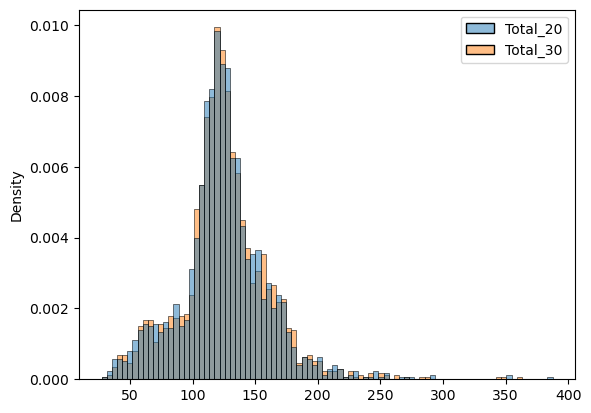

In [84]:
sns.histplot(df_merged, stat='density')

<AxesSubplot: ylabel='Density'>

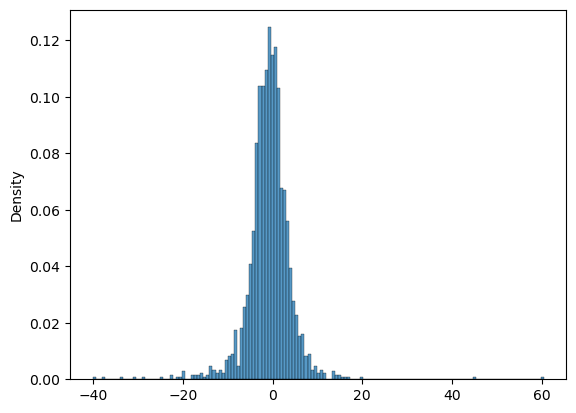

In [87]:
sns.histplot(df_merged['Total_20'] - df_merged['Total_30'], stat='density')